In [148]:
import numpy as np
from nilearn import image

from nipype.interfaces.fsl import FLIRT, WarpPoints, ApplyXFM
import pandas as pd


from tms_risk.utils import get_subjects
import os.path as op
from nilearn import image, plotting

In [116]:
bids_folder = '/data/ds-tmsrisk/'
subject = '01'

In [159]:
coords = np.loadtxt(op.join(bids_folder, 'derivatives', 'stim_coordinates', f'sub-{subject}', f'sub-{subject}_coords_warped.txt'))
T1w = image.load_img(op.join(bids_folder, f'derivatives/fmriprep/sub-{subject}/ses-1/anat/sub-{subject}_ses-1_desc-preproc_T1w.nii.gz'))

In [133]:
x, y, z = np.indices(image.load_img(T1w).shape)

In [136]:
xyz = np.vstack((x.ravel(), y.ravel(), z.ravel(), np.ones_like(x).ravel())).T

In [153]:
t1w_coords = image.new_img_like(T1w, np.dot(T1w.affine, xyz.T).T.reshape(im.shape + (4,)))

In [166]:
distance_to_coord = np.sqrt(((t1w_coords.get_fdata()[..., :3] - coords[np.newaxis, np.newaxis, np.newaxis, 0]) **2).sum(axis=-1))

In [167]:
distance_to_coord = image.new_img_like(T1w, distance_to_coord)

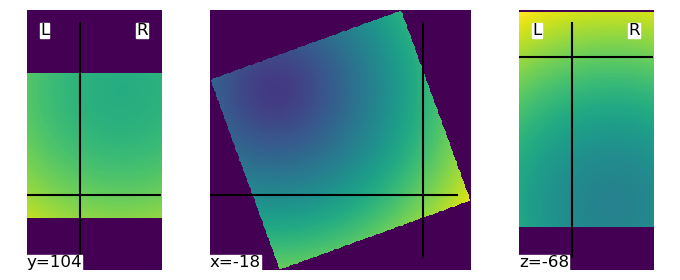

In [168]:
plotting.plot_img(distance_to_coord)

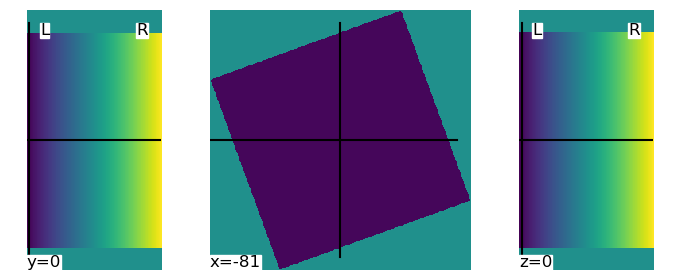

In [150]:
plotting.plot_img(image.index_img(image.new_img_like(T1w, t1w_coords), 0))

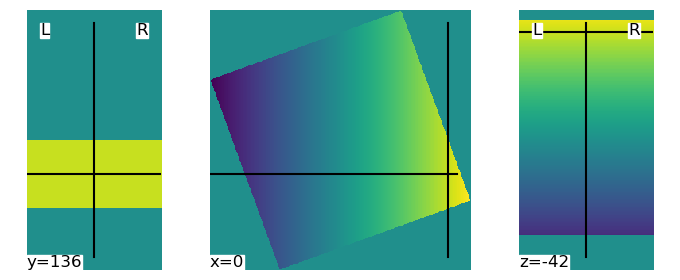

In [151]:
plotting.plot_img(image.index_img(image.new_img_like(T1w, t1w_coords), 1))

In [128]:
np.vstack((x.ravel(), y.ravel(), z.ravel())).T

array([[  0,   0,   0],
       [  0,   0,   1],
       [  0,   0,   2],
       ...,
       [169, 255, 253],
       [169, 255, 254],
       [169, 255, 255]])

In [112]:
' '.join([sub.subject for sub in get_subjects(all_tms_conditions=True)])

'01 02 03 04 05 06 07 09 10 11 18 19 21 25 26 29 30 31 34 35 36 37 45 46 47 50 53 56 59 62 63 67 69 72 74'

In [103]:
subject = '03'
flirt = FLIRT()

flirt.inputs.in_file = f'/data/ds-tmsrisk/derivatives/tms_navigation/sub-{subject}/sub-{subject}_T1w.nii.gz'
flirt.inputs.reference = f'/data/ds-tmsrisk/derivatives/fmriprep/sub-{subject}/ses-1/anat/sub-{subject}_ses-1_desc-preproc_T1w.nii.gz'

flirt.inputs.dof = 6


results = flirt.run()

TraitError: Cannot set the undefined 'base_directory' attribute of a 'FLIRTInputSpec' object.

In [91]:
# coords = pd.DataFrame([[112, 51, 188]])
# coords.to_csv('coords.csv', index=False, header=False, sep=' ')

In [88]:
coords = pd.DataFrame([[118, 45, 191]])
coords.to_csv('coords.txt', index=False, header=False, sep=' ')

In [92]:
coords = pd.DataFrame([[121.67, 41.55, 171.161]])
coords.to_csv('coords.txt', index=False, header=False, sep=' ')

In [93]:
applier = WarpPoints()

applier.inputs.in_coords = op.abspath('coords.txt')
applier.inputs.src_file = f'/data/ds-tmsrisk/derivatives/tms_navigation/sub-{subject}/sub-{subject}_T1w.nii.gz'
applier.inputs.dest_file = f'/data/ds-tmsrisk/derivatives/fmriprep/sub-{subject}/ses-1/anat/sub-{subject}_ses-1_desc-preproc_T1w.nii.gz'
applier.inputs.xfm_file = op.abspath(f'sub-{subject}_T1w_flirt.mat')
applier.inputs.coord_mm = True

r = applier.run()

230620-17:51:20,288 nipype.interface INFO:
	 stdout 2023-06-20T17:51:20.288518:Coordinates in Destination volume (in mm)
230620-17:51:20,290 nipype.interface INFO:
	 stdout 2023-06-20T17:51:20.290635:36.6765  -85.4591  44.1152


In [87]:
r.outputs


out_file = /Users/gdehol/git/tms_risk/tms_risk/registration/coords_warped.csv

In [78]:
applier = ApplyXFM()

applier.inputs.in_file = f'/data/ds-tmsrisk/derivatives/tms_navigation/sub-{subject}/sub-{subject}_T1w.nii.gz'
applier.inputs.reference = f'/data/ds-tmsrisk/derivatives/fmriprep/sub-{subject}/ses-1/anat/sub-{subject}_ses-1_desc-preproc_T1w.nii.gz'
applier.inputs.in_matrix_file = '/Users/gdehol/git/tms_risk/tms_risk/registration/sub-02_T1w_flirt.mat'

r = applier.run()

In [79]:
r.outputs


out_file = /Users/gdehol/git/tms_risk/tms_risk/registration/sub-02_T1w_flirt.nii.gz
out_log = <undefined>
out_matrix_file = /Users/gdehol/git/tms_risk/tms_risk/registration/sub-02_T1w_flirt.mat

In [95]:
import shutil
import glob

In [99]:
fns = glob.glob('/data/ds-tmsrisk/derivatives/stim_coordinates/sub_*.txt')

In [101]:
for fn in fns:
    shutil.move(fn, fn.replace('sub_', 'sub-').replace('.txt', '_coords.txt'))

In [81]:
applier.cmdline

'img2imgcoord -mm -dest /data/ds-tmsrisk/derivatives/fmriprep/sub-02/ses-1/anat/sub-02_ses-1_desc-preproc_T1w.nii.gz -src /data/ds-tmsrisk/derivatives/tms_navigation/sub-02/sub-02_T1w.nii.gz /Users/gdehol/git/tms_risk/tms_risk/registration/coords.txt'

In [71]:
r.outputs


out_file = /Users/gdehol/git/tms_risk/tms_risk/registration/coords_warped.csv

In [ ]:
coords = pd.DataFrame([[117.7289, 45.1205, 191.0949]])
coords.to_csv('coords.txt', index=False, header=False, sep=' ')

In [ ]:
results.outputs

In [34]:
subject = '01'
flirt = FLIRT()

flirt.inputs.in_file = '/data/ds-tmsrisk/derivatives/tms_navigation/sub-01/sub-01_T1w.nii.gz'
flirt.inputs.reference = f'/data/ds-tmsrisk/derivatives/fmriprep/sub-{subject}/ses-1/anat/sub-{subject}_ses-1_desc-preproc_T1w.nii.gz'

flirt.inputs.dof = 6


results = flirt.run()

In [46]:
import os.path as op

In [65]:
applier = WarpPoints()

applier.inputs.in_coords = op.abspath('coords.csv')
applier.inputs.src_file = '/data/ds-tmsrisk/derivatives/tms_navigation/sub-01/sub-01_T1w.nii.gz'
applier.inputs.dest_file = f'/data/ds-tmsrisk/derivatives/fmriprep/sub-{subject}/ses-1/anat/sub-{subject}_ses-1_desc-preproc_T1w.nii.gz'
applier.inputs.coord_mm = False

r = applier.run()

230620-17:34:28,821 nipype.interface INFO:
	 stdout 2023-06-20T17:34:28.821162:Coordinates in Destination volume (in voxels)
230620-17:34:28,822 nipype.interface INFO:
	 stdout 2023-06-20T17:34:28.822676:117.729  45.1205  191.095


In [66]:
coords = pd.DataFrame([[117.7289, 45.1205, 191.0949]])
coords.to_csv('coords.txt', index=False, header=False, sep=' ')

In [51]:
!cat coords.csv

117.7289 45.1205 191.0949


In [ ]:
coords.

In [36]:
results.outputs


out_file = /Users/gdehol/git/tms_risk/tms_risk/registration/sub-01_T1w_flirt.nii.gz
out_log = <undefined>
out_matrix_file = /Users/gdehol/git/tms_risk/tms_risk/registration/sub-01_T1w_flirt.mat

In [5]:
subject = '01'

In [6]:
coords = np.array([117.7289, 45.1205, 191.0949])

array([117.7289,  45.1205, 191.0949,   0.    ])

In [15]:
np.append(coords ,0)

array([117.7289,  45.1205, 191.0949,   0.    ])

In [27]:
im_ = image.load_img('/data/ds-tmsrisk/derivatives/tms_navigation/sub-01/sub-01_r2.thr.nii.gz')
im_.shape

(170, 292, 293)

In [24]:
im = image.load_img(f'/data/ds-tmsrisk/derivatives/fmriprep/sub-{subject}/ses-1/anat/sub-{subject}_ses-1_desc-preproc_T1w.nii.gz')
affine = im.affine

In [28]:
292 - 256

36

In [29]:
293 - 256

37

In [26]:
im.shape

(170, 256, 256)

In [22]:
coords

array([117.7289,  45.1205, 191.0949])

In [23]:
affine.dot(np.append(coords, 0))

array([117.7289    , -22.95890643, 195.00258693,   0.        ])

In [20]:
np.linalg.inv(affine).dot(np.append(coords, 0))

array([117.7289    , 107.75770792, 164.13834635,   0.        ])

In [21]:
affine

array([[   1.        ,    0.        ,    0.        ,  -85.        ],
       [   0.        ,    0.93969262,   -0.34202015,  -75.90440369],
       [   0.        ,    0.34202015,    0.93969262, -162.77752686],
       [   0.        ,    0.        ,    0.        ,    1.        ]])